In [33]:
import numpy as np
import pandas as pd
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

In [34]:
real_data = pd.read_csv("crab_age.csv")

synthetic_data = pd.read_csv("80000_rows_crab_syn_gmcm.csv")

# synthetic_data.drop(["Unnamed: 0"], axis = 1, inplace = True)

synthetic_data["Age"] = np.round(synthetic_data["Age"]).astype(int)
synthetic_data.drop(["id"], axis = 1, inplace = True)
synthetic_data

,Length,Height,Diameter,Weight,Shell Weight,Sex,Shucked Weight,Viscera Weight,Age
0,1.540001,0.402360,1.323187,38.412226,10.680817,I,15.502503,7.613415,13
1,1.009585,0.267158,0.771067,13.091663,3.417792,M,4.849712,2.909873,9
2,1.141395,0.302497,0.863719,17.369996,4.468052,M,8.744463,4.445586,10
3,1.706633,0.475369,1.188665,39.499762,11.058911,F,19.329699,8.829293,9
4,1.620136,0.447885,1.321516,46.447353,11.952823,F,19.867346,10.575771,12
...,...,...,...,...,...,...,...,...,...
79995,0.917701,0.239803,0.653802,3.011081,1.566707,M,2.062482,0.983874,7
79996,1.562894,0.423914,1.086210,32.555201,8.671204,M,15.944685,5.813928,7
79997,1.369313,0.353145,1.138286,16.554967,5.227133,M,9.600332,2.935033,7
79998,1.463028,0.385249,1.157487,26.639321,8.502676,I,10.529923,6.937421,15


In [35]:
num_of_rows_for_aug = round(len(real_data)/2)
num_of_rows_for_aug

37026

In [36]:
aug_data = []
for i in range (4):
    augumented_data = synthetic_data.sample(n = num_of_rows_for_aug) #sample rows from synthetic dataset
    aug_data.append(augumented_data)

<Axes: >

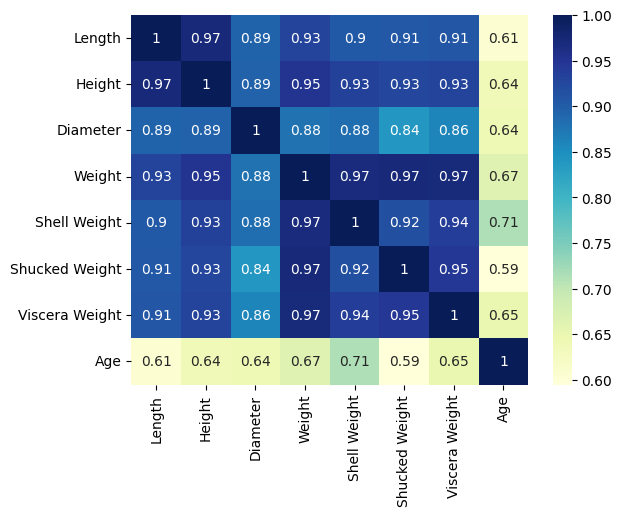

In [18]:
numeric_cols = augumented_data.select_dtypes(include=np.number).columns.tolist()
corr_matrix = augumented_data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', cbar=True)

In [19]:
real_data.drop(["id"],axis=1, inplace= True)

In [20]:
input_cols = real_data.columns[:-1]
input_cols

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

In [21]:
target = 'Age'
targets = real_data[target]
input_df = real_data[input_cols]
real_data.drop(columns=['Age'], inplace=True)

real_data

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395
...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(real_data, targets, test_size=0.1, random_state=42)

X_val_copy = X_val.copy()
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()
y_val = y_val.copy()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# target = 'Age'
# for data in aug_data:
#     target = 'Age'
#     augumened_targets = data[target]
#     data.drop(columns=['Age'], inplace=True)
#     augmented_train = pd.concat([X_train, data])
#     augmented_target = pd.concat([y_train, augumened_targets])
#     scaler = MinMaxScaler()
#     categorical_cols = augmented_train.select_dtypes(exclude=np.number).columns.tolist()
#     numeric_cols = augmented_train.select_dtypes(include=np.number).columns.tolist()
#     augmented_train[numeric_cols] = scaler.fit_transform(augmented_train[numeric_cols])
#     X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])


In [23]:
target = 'Age'
augumened_targets = augumented_data[target]
augumented_data.drop(columns=['Age'], inplace=True)


augumented_data

,Length,Height,Diameter,Weight,Shell Weight,Sex,Shucked Weight,Viscera Weight
26490,1.108489,0.312851,0.942815,9.664135,4.662423,M,5.359425,2.556988
33177,1.532526,0.397816,1.135098,33.417412,9.413120,I,12.953928,7.544154
2767,1.148343,0.268939,0.976624,9.116027,2.953161,I,4.265758,2.263690
15706,0.652622,0.151734,0.504756,2.395407,0.829073,F,1.347313,0.499342
61511,1.049932,0.288189,0.998810,12.573623,5.625751,I,3.689068,1.899879
...,...,...,...,...,...,...,...,...
77372,1.750520,0.503568,1.374758,50.630168,13.920285,M,21.245995,10.827540
72171,1.074335,0.272082,1.000191,12.942764,4.491800,M,5.572948,1.553905
78686,1.277127,0.325957,0.994228,18.864243,5.349104,I,9.682455,4.026421
65282,1.369870,0.336202,1.029011,27.560007,5.784230,M,11.687306,6.009217


In [24]:
augmented_train = pd.concat([X_train, augumented_data])
augmented_target = pd.concat([y_train, augumened_targets])

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
categorical_cols = augmented_train.select_dtypes(exclude=np.number).columns.tolist()
numeric_cols = augmented_train.select_dtypes(include=np.number).columns.tolist()
augmented_train[numeric_cols] = scaler.fit_transform(augmented_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])

In [26]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoder.fit(augmented_train[categorical_cols])

encoded_cols = encoder.get_feature_names_out()
encoded_cols

c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['Sex_F', 'Sex_I', 'Sex_M'], dtype=object)

In [27]:
augmented_train[encoded_cols] = encoder.transform(augmented_train[categorical_cols])
X_val[encoded_cols] = encoder.transform(X_val[categorical_cols])

In [28]:
input_cols = list(numeric_cols) + list(encoded_cols)
input_cols

['Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight',
 'Sex_F',
 'Sex_I',
 'Sex_M']

In [29]:
augmented_train = augmented_train[input_cols]
X_val = X_val[input_cols]

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Avoid division by zero for MAPE
    non_zero_mask = y_true != 0
    mape = (np.abs(y_true - y_pred) / y_true)[non_zero_mask].mean() * 100

    return pd.Series({
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    })

In [31]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid= {
    'n_estimators': [100,200,300,400],
    'max_depth': [1,3,5,7],
    'criterion': ['squared_error', 'poisson']
}


rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=5  #5 fold
)

rf_grid_search.fit(augmented_train, augmented_target)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_absolute_error')

In [32]:
best_rf = rf_grid_search.best_estimator_

best_rf.fit(augmented_train, augmented_target)
y_pred = best_rf.predict(X_val)

model_metrics = calculate_regression_metrics(y_val, y_pred)

model_metrics

MAE           1.469513
MSE           4.503902
RMSE          2.122240
R-squared     0.566279
MAPE         14.367141
dtype: float64

## GMCM DATA AUG

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load data
real_data = pd.read_csv("crab_age.csv")
synthetic_data = pd.read_csv("80000_rows_crab_syn_gmcm.csv")

# Preprocess synthetic_data
synthetic_data["Age"] = np.round(synthetic_data["Age"]).astype(int)
synthetic_data.drop(["id"], axis=1, inplace=True)

# Preprocess real_data
real_data.drop(["id"], axis=1, inplace=True)
target = 'Age'
targets = real_data[target]
input_cols = real_data.columns[:-1]
input_df = real_data[input_cols]
real_data.drop(columns=['Age'], inplace=True)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(real_data, targets, test_size=0.1, random_state=42)

categorical_cols = real_data.select_dtypes(exclude=np.number).columns.tolist()
numeric_cols = real_data.select_dtypes(include=np.number).columns.tolist()

# calculate regression metrics
def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Avoid division by zero for MAPE
    non_zero_mask = y_true != 0
    mape = (np.abs(y_true - y_pred) / y_true)[non_zero_mask].mean() * 100

    return pd.Series({
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    })

def run_experiment(real_data, synthetic_data, num_iterations=5):
    # Collecting metrics
    metrics = []
    all_metric = []

    for i in range(num_iterations):
        # Data Augmentation
        num_of_rows_for_aug = round(len(real_data) / 2)
        augmented_data = synthetic_data.sample(n=num_of_rows_for_aug)
        augmented_targets = augmented_data[target]
        augmented_train = pd.concat([X_train, augmented_data])
        augmented_target = pd.concat([y_train, augmented_targets])

        # Data Preprocessing (encoding)
        encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        encoder.fit(augmented_train[categorical_cols])
        encoded_cols = list(encoder.get_feature_names_out())
        
        augmented_train[encoded_cols] = encoder.transform(augmented_train[categorical_cols])
        X_val_encoded = X_val.copy()
        X_val_encoded[encoded_cols] = encoder.transform(X_val[categorical_cols])
        
        input_cols = list(numeric_cols) + encoded_cols
        augmented_train = augmented_train[input_cols]
        X_val_encoded = X_val_encoded[input_cols]

        # print("Augmented Train Shape:", augmented_train.shape)
        # print("Augmented Target Shape:", augmented_target.shape)
        # print("Augmented Train Type:", type(augmented_train))
        # print("Augmented Target Type:", type(augmented_target))
        # print("Augmented Train First Few Rows:", augmented_train.head())
        # print("Augmented Target First Few Rows:", augmented_target.head())
        # print("NaNs in Augmented Train:", augmented_train.isna().any().any())
        # print("NaNs in Augmented Target:", augmented_target.isna().any())

        # Model Training
        rf = RandomForestRegressor(random_state=42, n_jobs=-1)
        param_grid = {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [1, 3, 5, 7],
            'criterion': ['squared_error', 'poisson']
        }

        rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                                      scoring='neg_mean_absolute_error', n_jobs=-1, cv=5)
        rf_grid_search.fit(augmented_train, augmented_target)
        best_rf = rf_grid_search.best_estimator_

        # Prediction and Evaluation
        y_pred = best_rf.predict(X_val_encoded)
        model_metrics = calculate_regression_metrics(y_val, y_pred)
        all_metric.append(model_metrics)
        print(f"Iteration {i+1}:")
        print(model_metrics)
        print("\n")
    return all_metric

# Run the experiment
all_metric = run_experiment(real_data, synthetic_data, num_iterations=5)
print(all_metric)


c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Iteration 1:
MAE           1.468439
MSE           4.504336
RMSE          2.122342
R-squared     0.566237
MAPE         14.347198
dtype: float64




c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Iteration 2:
MAE           1.467587
MSE           4.502837
RMSE          2.121989
R-squared     0.566382
MAPE         14.339907
dtype: float64




c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Iteration 3:
MAE           1.468915
MSE           4.506771
RMSE          2.122916
R-squared     0.566003
MAPE         14.354169
dtype: float64




c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Iteration 4:
MAE           1.464866
MSE           4.493562
RMSE          2.119802
R-squared     0.567275
MAPE         14.303214
dtype: float64




c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Iteration 5:
MAE           1.468933
MSE           4.513127
RMSE          2.124412
R-squared     0.565391
MAPE         14.343282
dtype: float64


[MAE           1.468439
MSE           4.504336
RMSE          2.122342
R-squared     0.566237
MAPE         14.347198
dtype: float64, MAE           1.467587
MSE           4.502837
RMSE          2.121989
R-squared     0.566382
MAPE         14.339907
dtype: float64, MAE           1.468915
MSE           4.506771
RMSE          2.122916
R-squared     0.566003
MAPE         14.354169
dtype: float64, MAE           1.464866
MSE           4.493562
RMSE          2.119802
R-squared     0.567275
MAPE         14.303214
dtype: float64, MAE           1.468933
MSE           4.513127
RMSE          2.124412
R-squared     0.565391
MAPE         14.343282
dtype: float64]


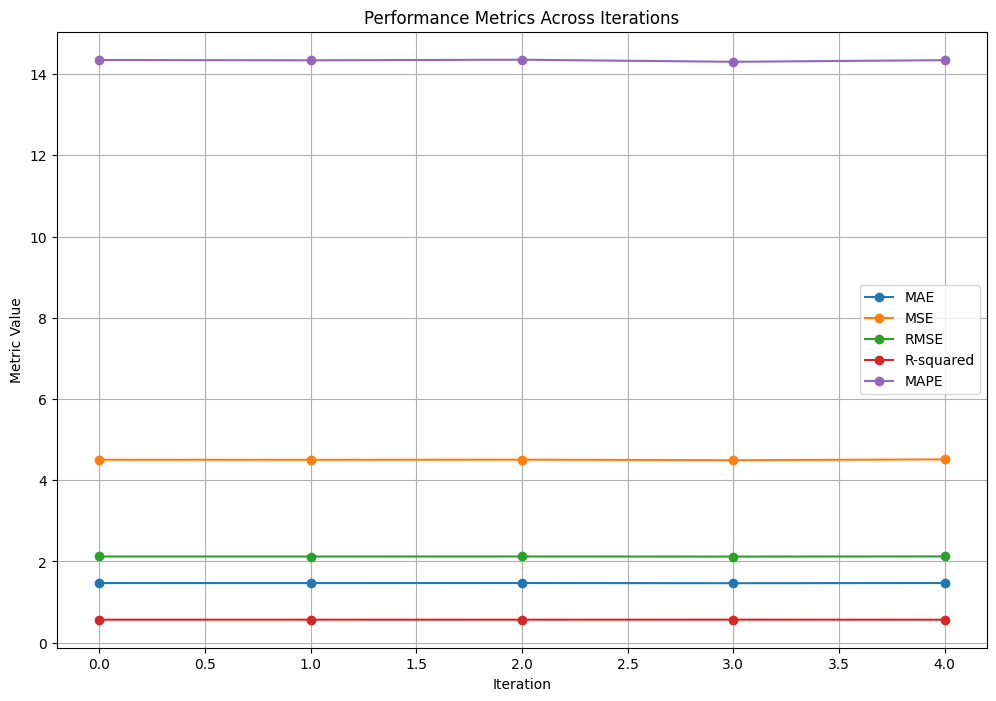

In [55]:
metrics_df = pd.DataFrame(all_metric)
metrics_df
import matplotlib.pyplot as plt
import pandas as pd

metrics_df = pd.DataFrame(all_metric)

plt.figure(figsize=(12, 8))
for metric in metrics_df.columns:
    plt.plot(metrics_df[metric], marker='o', label=metric)

plt.title('Performance Metrics Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()



In [62]:
metrics_df

,MAE,MSE,RMSE,R-squared,MAPE
0,1.468439,4.504336,2.122342,0.566237,14.347198
1,1.467587,4.502837,2.121989,0.566382,14.339907
2,1.468915,4.506771,2.122916,0.566003,14.354169
3,1.464866,4.493562,2.119802,0.567275,14.303214
4,1.468933,4.513127,2.124412,0.565391,14.343282


## GCKM DATA AUG

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load data
real_data = pd.read_csv("crab_age.csv")
synthetic_data = pd.read_csv("C:/Users/10063/OneDrive/桌面/synthetic data/kkk/full_experienment/Integrate_into_class/More_Features_Class/gckm_syn_data/Finalized_gckm_syn.csv")

synthetic_data["Age"] = np.round(synthetic_data["Age"]).astype(int)
#synthetic_data.drop(["id"], axis=1, inplace=True)

real_data.drop(["id"], axis=1, inplace=True)
target = 'Age'
targets = real_data[target]
input_cols = real_data.columns[:-1]
input_df = real_data[input_cols]
real_data.drop(columns=['Age'], inplace=True)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(real_data, targets, test_size=0.1, random_state=42)

categorical_cols = real_data.select_dtypes(exclude=np.number).columns.tolist()
numeric_cols = real_data.select_dtypes(include=np.number).columns.tolist()

def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Avoid division by zero for MAPE
    non_zero_mask = y_true != 0
    mape = (np.abs(y_true - y_pred) / y_true)[non_zero_mask].mean() * 100

    return pd.Series({
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    })

def run_experiment(real_data, synthetic_data, num_iterations=5):
    # Collecting metrics
    metrics = []
    all_metric = []

    for i in range(num_iterations): 
        # Data Augmentation
        num_of_rows_for_aug = round(len(real_data) / 2)
        augmented_data = synthetic_data.sample(n=num_of_rows_for_aug)
        augmented_targets = augmented_data[target]
        augmented_train = pd.concat([X_train, augmented_data])
        augmented_target = pd.concat([y_train, augmented_targets])

        # Data Preprocessing (encoding)
        encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        encoder.fit(augmented_train[categorical_cols])
        encoded_cols = list(encoder.get_feature_names_out())
        
        augmented_train[encoded_cols] = encoder.transform(augmented_train[categorical_cols])
        X_val_encoded = X_val.copy()
        X_val_encoded[encoded_cols] = encoder.transform(X_val[categorical_cols])
        
        input_cols = list(numeric_cols) + encoded_cols
        augmented_train = augmented_train[input_cols]
        X_val_encoded = X_val_encoded[input_cols]

        # # Debugging: Check the shapes and types of the data
        # print("Augmented Train Shape:", augmented_train.shape)
        # print("Augmented Target Shape:", augmented_target.shape)
        # print("Augmented Train Type:", type(augmented_train))
        # print("Augmented Target Type:", type(augmented_target))
        # print("Augmented Train First Few Rows:", augmented_train.head())
        # print("Augmented Target First Few Rows:", augmented_target.head())
        # print("NaNs in Augmented Train:", augmented_train.isna().any().any())
        # print("NaNs in Augmented Target:", augmented_target.isna().any())

        # Model Training
        rf = RandomForestRegressor(random_state=42, n_jobs=-1)
        param_grid = {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [1, 3, 5, 7],
            'criterion': ['squared_error', 'poisson']
        }

        rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                                      scoring='neg_mean_absolute_error', n_jobs=-1, cv=5)
        rf_grid_search.fit(augmented_train, augmented_target)
        best_rf = rf_grid_search.best_estimator_

        # Prediction and Evaluation
        y_pred = best_rf.predict(X_val_encoded)
        model_metrics = calculate_regression_metrics(y_val, y_pred)
        all_metric.append(model_metrics)
        print(f"Iteration {i+1}:")
        print(model_metrics)
        print("\n")
    return all_metric

# Run the experiment
all_metric = run_experiment(real_data, synthetic_data, num_iterations=5)
print(all_metric)

c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Iteration 1:
MAE           1.453085
MSE           4.418627
RMSE          2.102053
R-squared     0.574491
MAPE         14.207764
dtype: float64




c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Iteration 2:
MAE           1.449683
MSE           4.405281
RMSE          2.098876
R-squared     0.575776
MAPE         14.170362
dtype: float64




c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Iteration 3:
MAE           1.451684
MSE           4.410739
RMSE          2.100176
R-squared     0.575250
MAPE         14.200717
dtype: float64




c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Iteration 4:
MAE           1.452344
MSE           4.411802
RMSE          2.100429
R-squared     0.575148
MAPE         14.210986
dtype: float64




c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Iteration 5:
MAE           1.449542
MSE           4.399002
RMSE          2.097380
R-squared     0.576381
MAPE         14.172262
dtype: float64


[MAE           1.453085
MSE           4.418627
RMSE          2.102053
R-squared     0.574491
MAPE         14.207764
dtype: float64, MAE           1.449683
MSE           4.405281
RMSE          2.098876
R-squared     0.575776
MAPE         14.170362
dtype: float64, MAE           1.451684
MSE           4.410739
RMSE          2.100176
R-squared     0.575250
MAPE         14.200717
dtype: float64, MAE           1.452344
MSE           4.411802
RMSE          2.100429
R-squared     0.575148
MAPE         14.210986
dtype: float64, MAE           1.449542
MSE           4.399002
RMSE          2.097380
R-squared     0.576381
MAPE         14.172262
dtype: float64]


In [67]:
metrics_df_gckm = pd.DataFrame(all_metric)

metrics_df_gckm

,MAE,MSE,RMSE,R-squared,MAPE
0,1.453085,4.418627,2.102053,0.574491,14.207764
1,1.449683,4.405281,2.098876,0.575776,14.170362
2,1.451684,4.410739,2.100176,0.575250,14.200717
3,1.452344,4.411802,2.100429,0.575148,14.210986
4,1.449542,4.399002,2.097380,0.576381,14.172262


In [68]:
metrics_df

,MAE,MSE,RMSE,R-squared,MAPE
0,1.468439,4.504336,2.122342,0.566237,14.347198
1,1.467587,4.502837,2.121989,0.566382,14.339907
2,1.468915,4.506771,2.122916,0.566003,14.354169
3,1.464866,4.493562,2.119802,0.567275,14.303214
4,1.468933,4.513127,2.124412,0.565391,14.343282


## SDV DATA AUG

In [69]:
import pandas as pd

import numpy as np
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality
from sdv.single_table import GaussianCopulaSynthesizer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

metadata1 = SingleTableMetadata()
data_crab = pd.read_csv("crab_age.csv")
metadata1.detect_from_dataframe(data = data_crab)
synthesier = GaussianCopulaSynthesizer(metadata1)
synthesier.fit(data_crab)
synthetic_data = synthesier.sample(num_rows = 74051)  #keep the number of rows equal to the data hold

# Load data
real_data = pd.read_csv("crab_age.csv")

synthetic_data["Age"] = np.round(synthetic_data["Age"]).astype(int)
synthetic_data.drop(["id"], axis=1, inplace=True)

real_data.drop(["id"], axis=1, inplace=True)
target = 'Age'
targets = real_data[target]
input_cols = real_data.columns[:-1]
input_df = real_data[input_cols]
real_data.drop(columns=['Age'], inplace=True)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(real_data, targets, test_size=0.1, random_state=42)

categorical_cols = real_data.select_dtypes(exclude=np.number).columns.tolist()
numeric_cols = real_data.select_dtypes(include=np.number).columns.tolist()

def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Avoid division by zero for MAPE
    non_zero_mask = y_true != 0
    mape = (np.abs(y_true - y_pred) / y_true)[non_zero_mask].mean() * 100

    return pd.Series({
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    })

# Function to run the experiment
def run_experiment(real_data, synthetic_data, num_iterations=5):
    # Collecting metrics
    metrics = []
    all_metric = []

    for i in range(num_iterations):
        # Data Augmentation
        num_of_rows_for_aug = round(len(real_data) / 2)
        augmented_data = synthetic_data.sample(n=num_of_rows_for_aug)
        augmented_targets = augmented_data[target]
        augmented_train = pd.concat([X_train, augmented_data])
        augmented_target = pd.concat([y_train, augmented_targets])

        # Data Preprocessing (encoding)
        encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        encoder.fit(augmented_train[categorical_cols])
        encoded_cols = list(encoder.get_feature_names_out())
        
        augmented_train[encoded_cols] = encoder.transform(augmented_train[categorical_cols])
        X_val_encoded = X_val.copy()
        X_val_encoded[encoded_cols] = encoder.transform(X_val[categorical_cols])
        
        input_cols = list(numeric_cols) + encoded_cols
        augmented_train = augmented_train[input_cols]
        X_val_encoded = X_val_encoded[input_cols]

        # # Debugging: Check the shapes and types of the data
        # print("Augmented Train Shape:", augmented_train.shape)
        # print("Augmented Target Shape:", augmented_target.shape)
        # print("Augmented Train Type:", type(augmented_train))
        # print("Augmented Target Type:", type(augmented_target))
        # print("Augmented Train First Few Rows:", augmented_train.head())
        # print("Augmented Target First Few Rows:", augmented_target.head())
        # print("NaNs in Augmented Train:", augmented_train.isna().any().any())
        # print("NaNs in Augmented Target:", augmented_target.isna().any())

        # Model Training
        rf = RandomForestRegressor(random_state=42, n_jobs=-1)
        param_grid = {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [1, 3, 5, 7],
            'criterion': ['squared_error', 'poisson']
        }

        rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                                      scoring='neg_mean_absolute_error', n_jobs=-1, cv=5)
        rf_grid_search.fit(augmented_train, augmented_target)
        best_rf = rf_grid_search.best_estimator_

        # Prediction and Evaluation
        y_pred = best_rf.predict(X_val_encoded)
        model_metrics = calculate_regression_metrics(y_val, y_pred)
        all_metric.append(model_metrics)
        print(f"Iteration {i+1}:")
        print(model_metrics)
        print("\n")
    return all_metric

# Run the experiment
all_metric = run_experiment(real_data, synthetic_data, num_iterations=5)
metrics_df_sdv = pd.DataFrame(all_metric)

metrics_df_sdv

c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Iteration 1:
MAE           1.458085
MSE           4.430518
RMSE          2.104880
R-squared     0.573346
MAPE         14.260068
dtype: float64




c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Iteration 2:
MAE           1.459565
MSE           4.430853
RMSE          2.104959
R-squared     0.573313
MAPE         14.279191
dtype: float64




c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Iteration 3:
MAE           1.458364
MSE           4.434532
RMSE          2.105833
R-squared     0.572959
MAPE         14.257366
dtype: float64




c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Iteration 4:
MAE           1.460269
MSE           4.441395
RMSE          2.107462
R-squared     0.572298
MAPE         14.280790
dtype: float64




c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Iteration 5:
MAE           1.460211
MSE           4.435573
RMSE          2.106080
R-squared     0.572859
MAPE         14.288994
dtype: float64




,MAE,MSE,RMSE,R-squared,MAPE
0,1.458085,4.430518,2.104880,0.573346,14.260068
1,1.459565,4.430853,2.104959,0.573313,14.279191
2,1.458364,4.434532,2.105833,0.572959,14.257366
3,1.460269,4.441395,2.107462,0.572298,14.280790
4,1.460211,4.435573,2.106080,0.572859,14.288994


In [70]:
metrics_df_gckm

,MAE,MSE,RMSE,R-squared,MAPE
0,1.453085,4.418627,2.102053,0.574491,14.207764
1,1.449683,4.405281,2.098876,0.575776,14.170362
2,1.451684,4.410739,2.100176,0.575250,14.200717
3,1.452344,4.411802,2.100429,0.575148,14.210986
4,1.449542,4.399002,2.097380,0.576381,14.172262


In [71]:
metrics_df

,MAE,MSE,RMSE,R-squared,MAPE
0,1.468439,4.504336,2.122342,0.566237,14.347198
1,1.467587,4.502837,2.121989,0.566382,14.339907
2,1.468915,4.506771,2.122916,0.566003,14.354169
3,1.464866,4.493562,2.119802,0.567275,14.303214
4,1.468933,4.513127,2.124412,0.565391,14.343282


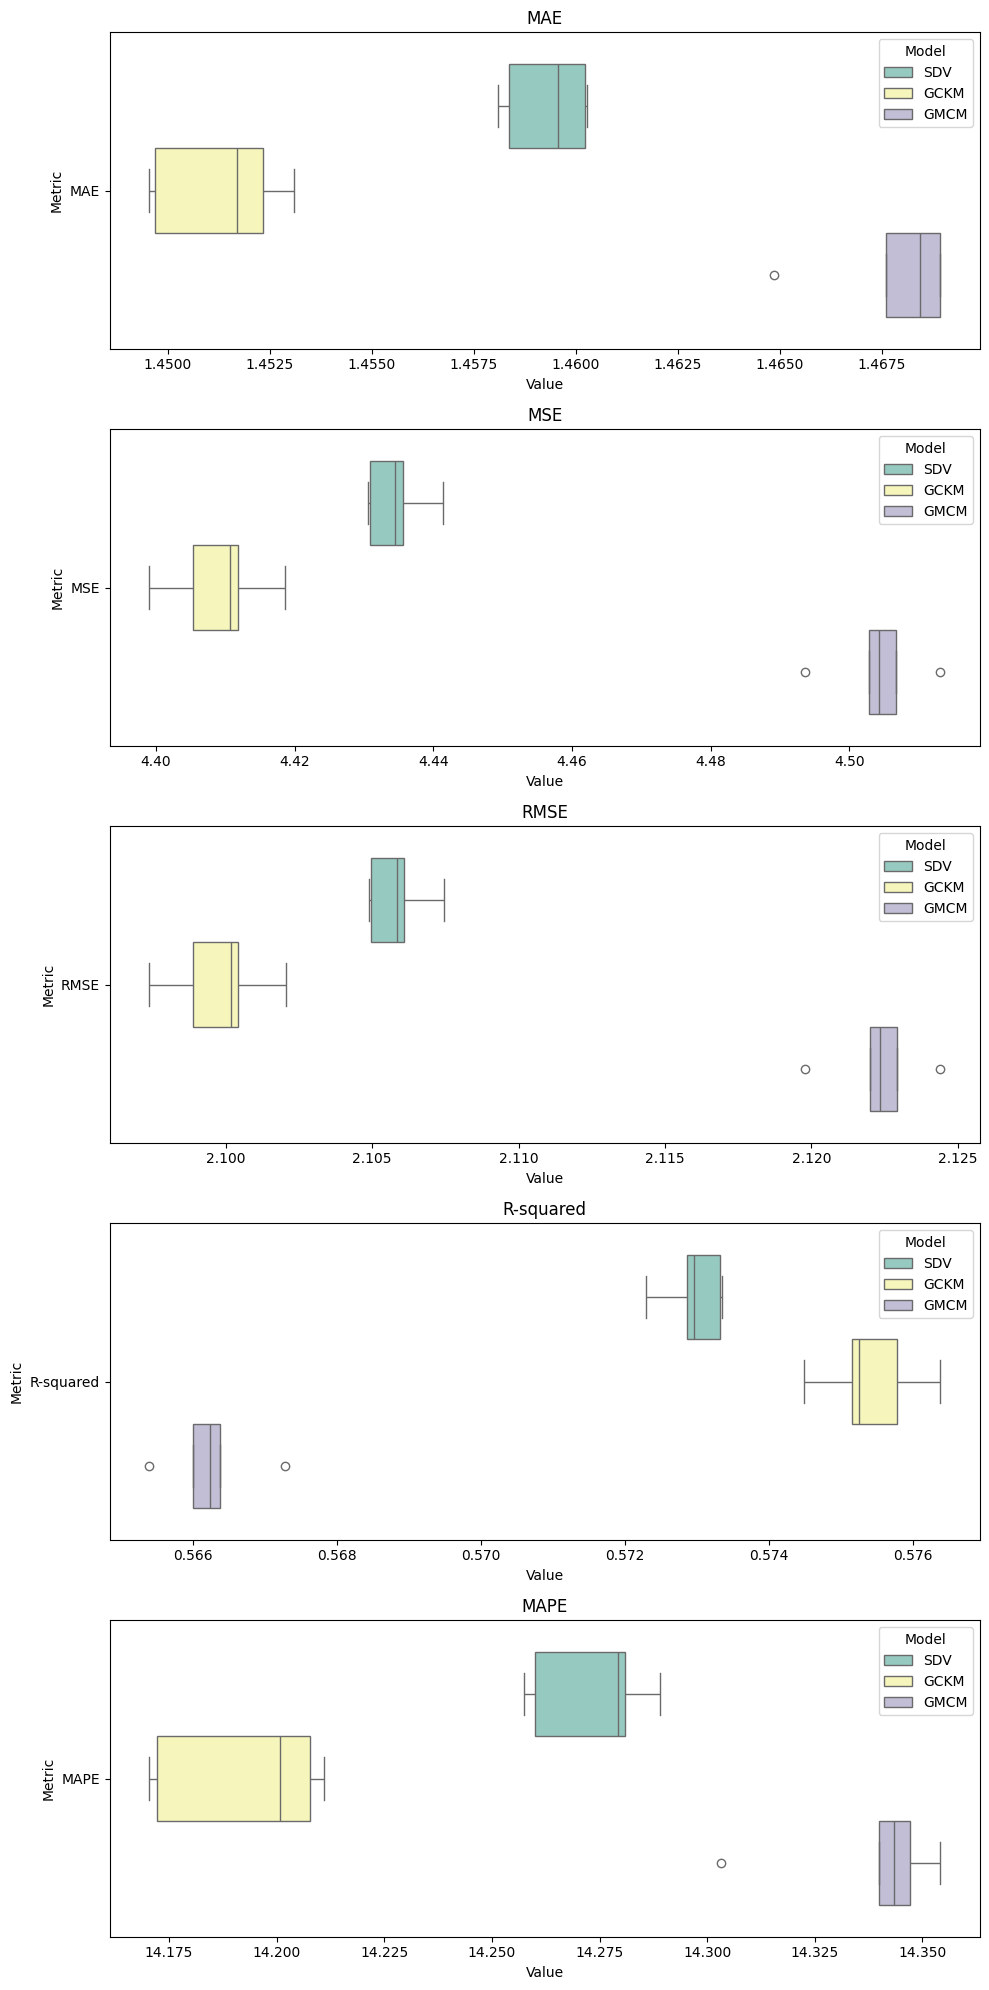

In [75]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


metrics_df_sdv_melted = metrics_df_sdv.melt(var_name='Metric', value_name='Value')
metrics_df_sdv_melted['Model'] = 'SDV'
metrics_df_gckm_melted = metrics_df_gckm.melt(var_name='Metric', value_name='Value')
metrics_df_gckm_melted['Model'] = 'GCKM'
metrics_df_gmcm_melted = metrics_df.melt(var_name='Metric', value_name='Value')
metrics_df_gmcm_melted['Model'] = 'GMCM'


combined_metrics_df = pd.concat([metrics_df_sdv_melted, metrics_df_gckm_melted, metrics_df_gmcm_melted])


fig, axes = plt.subplots(5, 1, figsize=(10, 20), sharex=False)


for ax, metric in zip(axes, combined_metrics_df['Metric'].unique()):
    sns.boxplot(data=combined_metrics_df[combined_metrics_df['Metric'] == metric], 
                 y='Metric', x='Value', hue='Model', ax=ax, orient='h', palette="Set3")
    ax.set_title(metric)


plt.tight_layout()
plt.show()




## YData Added

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
import numpy as np
import pandas as pd
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings('ignore')

In [2]:
# Load data
real_data = pd.read_csv("crab_age.csv")
synthetic_data = pd.read_csv("crab_age_80000_ydata.csv")

#synthetic_data["Age"] = np.round(synthetic_data["Age"]).astype(int)
synthetic_data.drop(["id"], axis=1, inplace=True)

real_data.drop(["id"], axis=1, inplace=True)
target = 'Age'
targets = real_data[target]
input_cols = real_data.columns[:-1]
input_df = real_data[input_cols]
real_data.drop(columns=['Age'], inplace=True)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(real_data, targets, test_size=0.1, random_state=42)

categorical_cols = real_data.select_dtypes(exclude=np.number).columns.tolist()
numeric_cols = real_data.select_dtypes(include=np.number).columns.tolist()

def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    non_zero_mask = y_true != 0
    mape = (np.abs(y_true - y_pred) / y_true)[non_zero_mask].mean() * 100

    return pd.Series({
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    })

# Function to run the experiment
def run_experiment(real_data, synthetic_data, num_iterations=5):
    # Collecting metrics
    metrics = []
    all_metric = []

    for i in range(num_iterations):  
        # Data Augmentation
        num_of_rows_for_aug = round(len(real_data) / 2)
        augmented_data = synthetic_data.sample(n=num_of_rows_for_aug)
        augmented_targets = augmented_data[target]
        augmented_train = pd.concat([X_train, augmented_data])
        augmented_target = pd.concat([y_train, augmented_targets])

        # Data Preprocessing (encoding)
        encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        encoder.fit(augmented_train[categorical_cols])
        encoded_cols = list(encoder.get_feature_names_out())
        
        augmented_train[encoded_cols] = encoder.transform(augmented_train[categorical_cols])
        X_val_encoded = X_val.copy()
        X_val_encoded[encoded_cols] = encoder.transform(X_val[categorical_cols])
        
        input_cols = list(numeric_cols) + encoded_cols
        augmented_train = augmented_train[input_cols]
        X_val_encoded = X_val_encoded[input_cols]

        # # Debugging: Check the shapes and types of the data
        # print("Augmented Train Shape:", augmented_train.shape)
        # print("Augmented Target Shape:", augmented_target.shape)
        # print("Augmented Train Type:", type(augmented_train))
        # print("Augmented Target Type:", type(augmented_target))
        # print("Augmented Train First Few Rows:", augmented_train.head())
        # print("Augmented Target First Few Rows:", augmented_target.head())
        # print("NaNs in Augmented Train:", augmented_train.isna().any().any())
        # print("NaNs in Augmented Target:", augmented_target.isna().any())

        # Model Training
        rf = RandomForestRegressor(random_state=42, n_jobs=-1)
        param_grid = {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [1, 3, 5, 7],
            'criterion': ['squared_error', 'poisson']
        }

        rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                                      scoring='neg_mean_absolute_error', n_jobs=-1, cv=5)
        rf_grid_search.fit(augmented_train, augmented_target)
        best_rf = rf_grid_search.best_estimator_

        # Prediction and Evaluation
        y_pred = best_rf.predict(X_val_encoded)
        model_metrics = calculate_regression_metrics(y_val, y_pred)
        all_metric.append(model_metrics)
        print(f"Iteration {i+1}:")
        print(model_metrics)
        print("\n")
    return all_metric

# Run the experiment
all_metric = run_experiment(real_data, synthetic_data, num_iterations=5)
print(all_metric)



Iteration 1:
MAE           1.449975
MSE           4.396791
RMSE          2.096853
R-squared     0.576594
MAPE         14.245851
dtype: float64


Iteration 2:
MAE           1.448838
MSE           4.405723
RMSE          2.098981
R-squared     0.575734
MAPE         14.237483
dtype: float64


Iteration 3:
MAE           1.448718
MSE           4.399189
RMSE          2.097424
R-squared     0.576363
MAPE         14.237611
dtype: float64


Iteration 4:
MAE           1.447765
MSE           4.392780
RMSE          2.095896
R-squared     0.576980
MAPE         14.232370
dtype: float64


Iteration 5:
MAE           1.448115
MSE           4.393696
RMSE          2.096114
R-squared     0.576892
MAPE         14.220034
dtype: float64


[MAE           1.449975
MSE           4.396791
RMSE          2.096853
R-squared     0.576594
MAPE         14.245851
dtype: float64, MAE           1.448838
MSE           4.405723
RMSE          2.098981
R-squared     0.575734
MAPE         14.237483
dtype: float64, MAE         

In [3]:
all_metrics_gmcm = [{'MAE': 1.468439,
  'MSE': 4.504336,
  'RMSE': 2.122342,
  'R-squared': 0.566237,
  'MAPE': 14.347198},
 {'MAE': 1.467587,
  'MSE': 4.502837,
  'RMSE': 2.121989,
  'R-squared': 0.566382,
  'MAPE': 14.339907},
 {'MAE': 1.468915,
  'MSE': 4.506771,
  'RMSE': 2.122916,
  'R-squared': 0.566003,
  'MAPE': 14.354169},
 {'MAE': 1.464866,
  'MSE': 4.493562,
  'RMSE': 2.119802,
  'R-squared': 0.567275,
  'MAPE': 14.303214},
 {'MAE': 1.468933,
  'MSE': 4.513127,
  'RMSE': 2.124412,
  'R-squared': 0.565391,
  'MAPE': 14.343282}]

all_metrics_gckm = [{'MAE': 1.453085,
  'MSE': 4.418627,
  'RMSE': 2.102053,
  'R-squared': 0.574491,
  'MAPE': 14.207764},
 {'MAE': 1.449683,
  'MSE': 4.405281,
  'RMSE': 2.098876,
  'R-squared': 0.575776,
  'MAPE': 14.170362},
 {'MAE': 1.451684,
  'MSE': 4.410739,
  'RMSE': 2.100176,
  'R-squared': 0.57525,
  'MAPE': 14.200717},
 {'MAE': 1.452344,
  'MSE': 4.411802,
  'RMSE': 2.100429,
  'R-squared': 0.575148,
  'MAPE': 14.210986},
 {'MAE': 1.449542,
  'MSE': 4.399002,
  'RMSE': 2.09738,
  'R-squared': 0.576381,
  'MAPE': 14.172262}]

all_metrics_sdv = [{'MAE': 1.458085,
  'MSE': 4.430518,
  'RMSE': 2.10488,
  'R-squared': 0.573346,
  'MAPE': 14.260068},
 {'MAE': 1.459565,
  'MSE': 4.430853,
  'RMSE': 2.104959,
  'R-squared': 0.573313,
  'MAPE': 14.279191},
 {'MAE': 1.458364,
  'MSE': 4.434532,
  'RMSE': 2.105833,
  'R-squared': 0.572959,
  'MAPE': 14.257366},
 {'MAE': 1.460269,
  'MSE': 4.441395,
  'RMSE': 2.107462,
  'R-squared': 0.572298,
  'MAPE': 14.28079},
 {'MAE': 1.460211,
  'MSE': 4.435573,
  'RMSE': 2.10608,
  'R-squared': 0.572859,
  'MAPE': 14.288994}]

In [4]:
metrics_df_gmcm = pd.DataFrame(all_metrics_gmcm)
metrics_df_gckm = pd.DataFrame(all_metrics_gckm)
metrics_df_sdv = pd.DataFrame(all_metrics_sdv)
metrics_df_y_data = pd.DataFrame(all_metric)

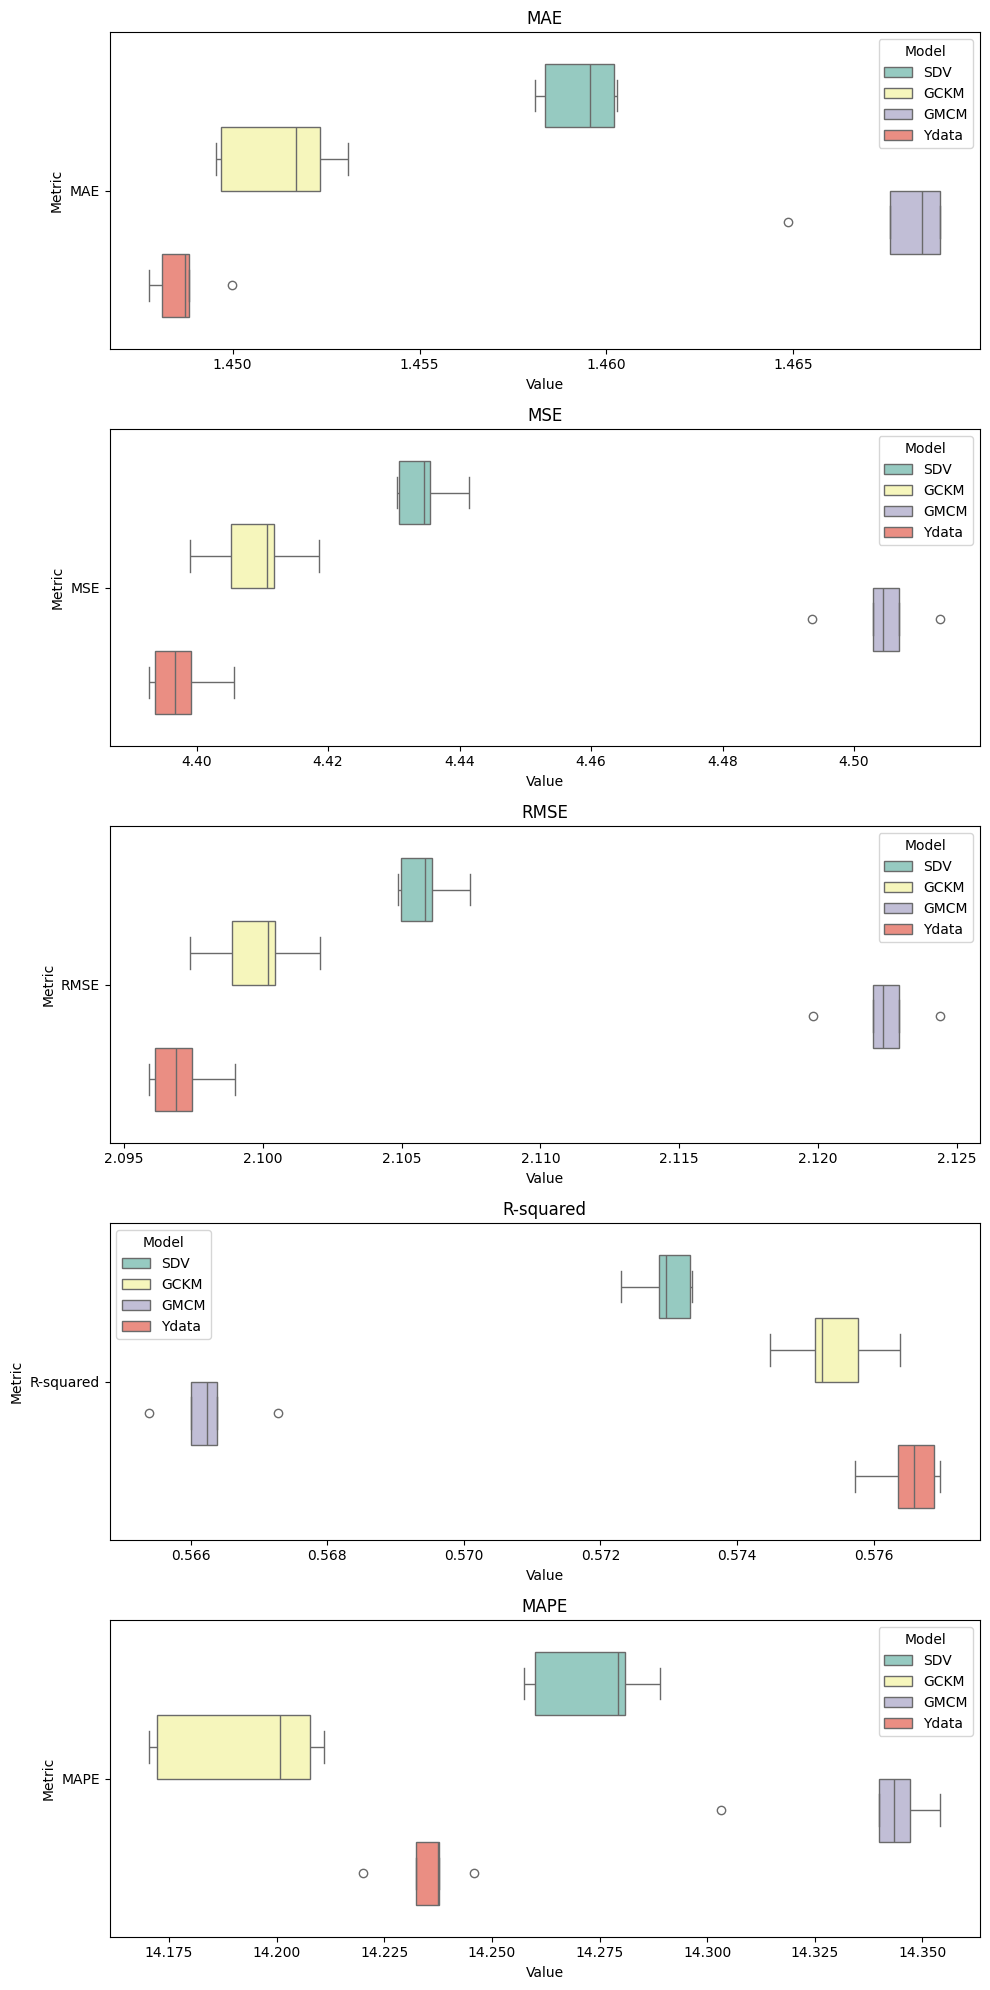

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


metrics_df_sdv_melted = metrics_df_sdv.melt(var_name='Metric', value_name='Value')
metrics_df_sdv_melted['Model'] = 'SDV'
metrics_df_gckm_melted = metrics_df_gckm.melt(var_name='Metric', value_name='Value')
metrics_df_gckm_melted['Model'] = 'GCKM'
metrics_df_gmcm_melted = metrics_df_gmcm.melt(var_name='Metric', value_name='Value')
metrics_df_gmcm_melted['Model'] = 'GMCM'
metrics_df_y_data_melted = metrics_df_y_data.melt(var_name='Metric', value_name='Value')
metrics_df_y_data_melted['Model'] = 'Ydata'


combined_metrics_df = pd.concat([metrics_df_sdv_melted, metrics_df_gckm_melted, metrics_df_gmcm_melted, metrics_df_y_data_melted])


fig, axes = plt.subplots(5, 1, figsize=(10, 20), sharex=False)


for ax, metric in zip(axes, combined_metrics_df['Metric'].unique()):
    sns.boxplot(data=combined_metrics_df[combined_metrics_df['Metric'] == metric], 
                 y='Metric', x='Value', hue='Model', ax=ax, orient='h', palette="Set3")
    ax.set_title(metric)


plt.tight_layout()
plt.show()

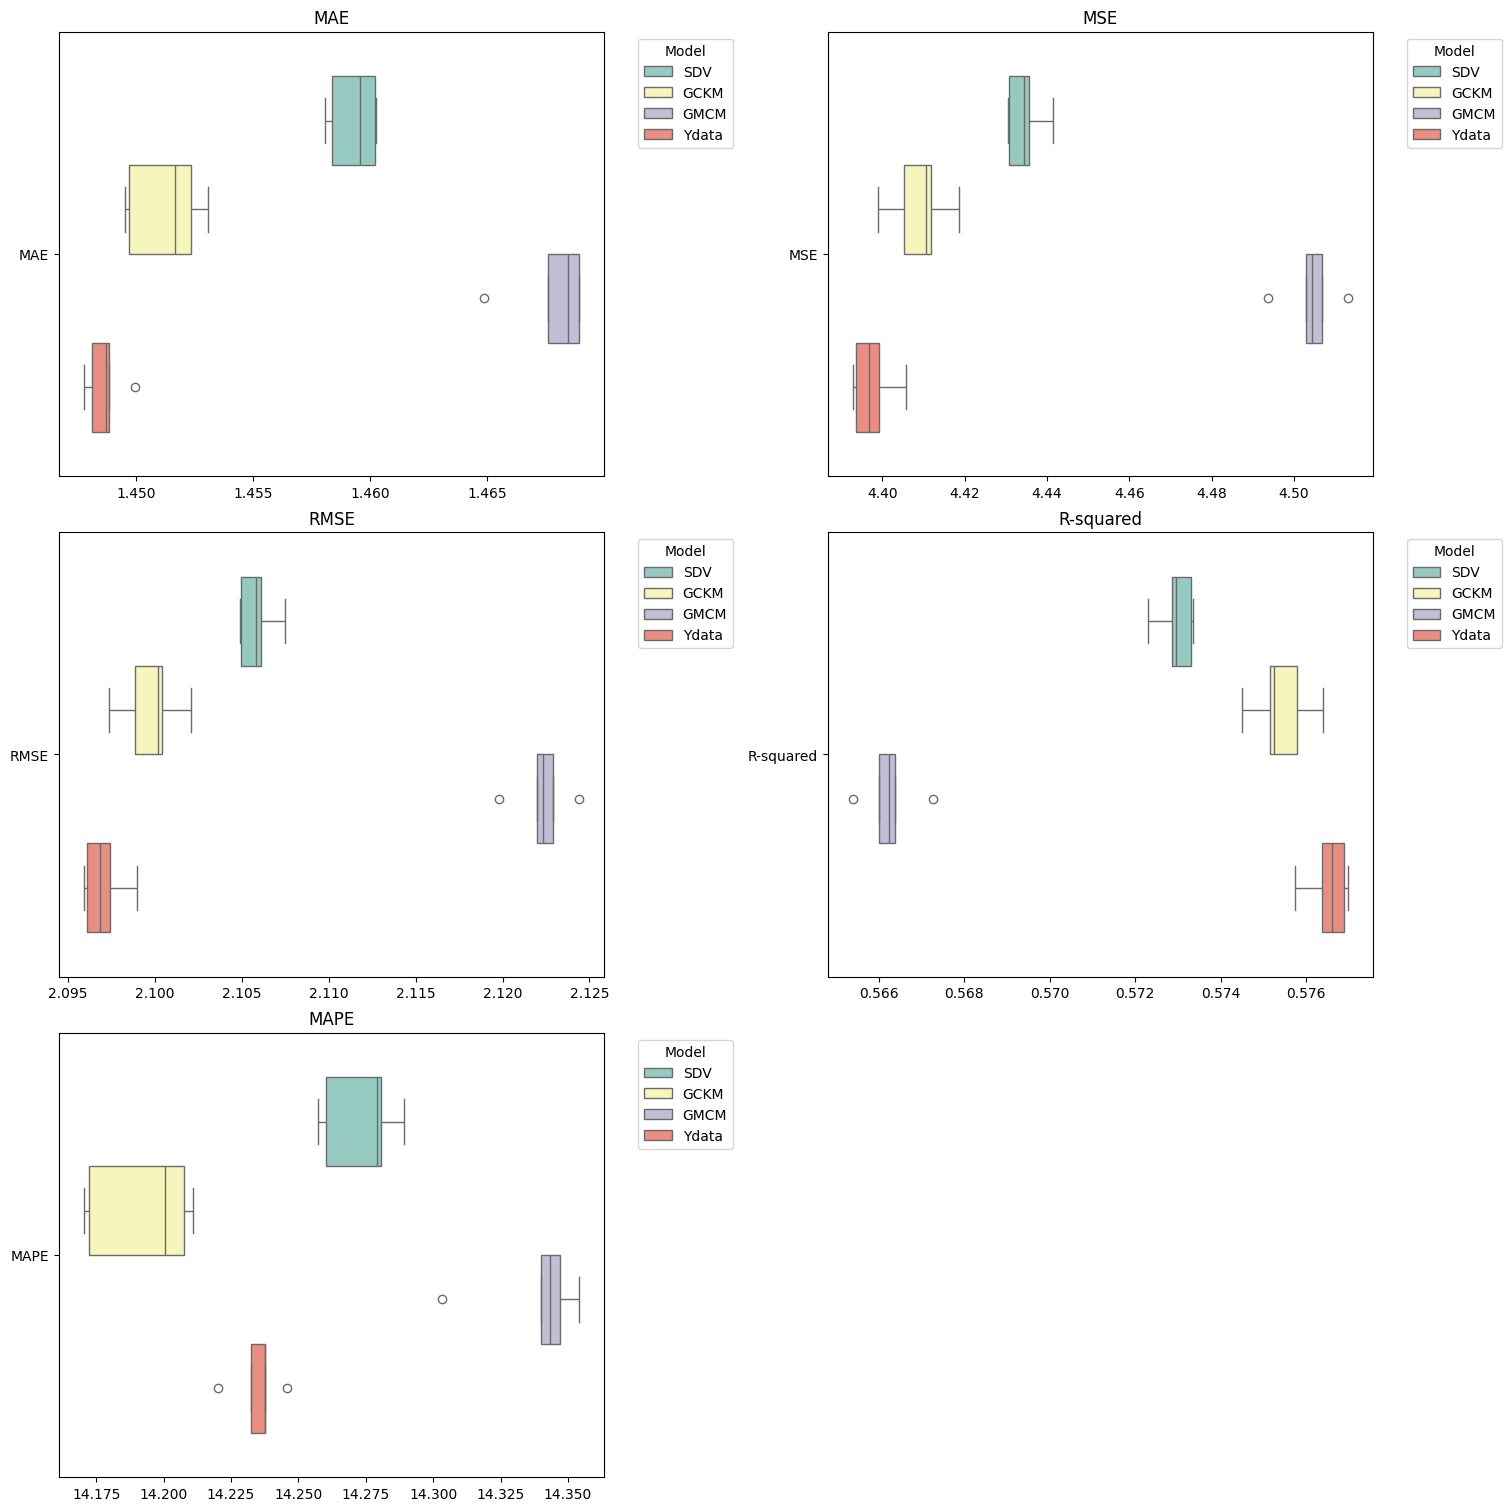

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15), constrained_layout=True)


(ax1, ax2), (ax3, ax4), (ax5, ax6) = axes

axes_dict = {
    'MAE': ax1,
    'MSE': ax2,
    'RMSE': ax3,
    'R-squared': ax4,
    'MAPE': ax5
}

fig.delaxes(ax6)

# Plotting boxplots for each metric
for metric, ax in axes_dict.items():
    sns.boxplot(data=combined_metrics_df[combined_metrics_df['Metric'] == metric], 
                 y='Metric', x='Value', hue='Model', ax=ax, orient='h', palette="Set3")
    ax.set_title(metric)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()